In [1]:
from sklearn.neighbors import LSHForest, KNeighborsClassifier
from sklearn.metrics import accuracy_score, zero_one_loss
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация

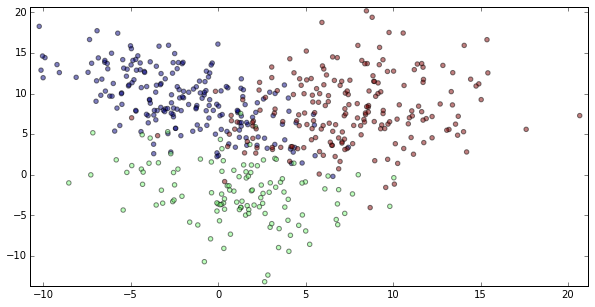

In [2]:
a = scipy.stats.multivariate_normal.rvs(size=200, mean=[-2, 9], cov=[[12, -5.5], [-5.5, 12]])
b = scipy.stats.multivariate_normal.rvs(size=120, mean=[1.5, -2], cov=[[13, -3], [-3, 13]])
c = scipy.stats.multivariate_normal.rvs(size=198, mean=[7, 8], cov=[[18, 3], [3, 18]])
x_train = np.vstack([a, b, c])
y_train = np.hstack([np.zeros(len(a)), np.ones(len(b)), np.ones(len(c)) * 2])

plt.figure(figsize=(10, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, alpha=0.5)
plt.xlim((min(x_train[:, 0]) - 0.5, max(x_train[:, 0]) + 0.5))
plt.ylim((min(x_train[:, 1]) - 0.5, max(x_train[:, 1]) + 0.5))
plt.show()

In [3]:
x_train = x_train - np.mean(x_train, axis=0)

x_test = x_train[-35:]
y_test = y_train[-35:]

x_train = x_train[:-35]
y_train = y_train[:-35]

In [4]:
def choose_class(neighbours, classes):
    neighbours_classes = [classes[index] for index in neighbours]
    rate = [(neighb_class, neighbours_classes.count(neighb_class)) for neighb_class in set(neighbours_classes)]
    rate.sort(key=lambda x: -x[1])
    return rate[0][0]

In [5]:
def lsh_predict_classes(X, Y, X_test, number_neighbours=4, number_estimators=10, radius=1.):
    lshf = LSHForest(n_neighbors=number_neighbours, n_estimators=number_estimators, radius=radius)
    lshf.fit(X)  
    neighbours = lshf.kneighbors(X_test, n_neighbors=number_neighbours)[1]
    return [choose_class(neighbours_of_one, Y) for neighbours_of_one in neighbours]

In [6]:
def create_picture(X_train, Y_train, precision=0.02, border=1, title='', fig_size=8):   
    space = np.mgrid[min(X_train[:,0]) - border:max(X_train[:,0]) + border:precision,
                     min(X_train[:,1]) - border:max(X_train[:,1]) + border:precision]
    
    predicted_classes = lsh_predict_classes(X_train, Y_train, np.c_[space[0].ravel(), space[1].ravel(0)]) 
    plt.figure(figsize(12,12))
    plt.xlim(min(X_train[:,0]) - border, max(X_train[:,0]) + border)
    plt.ylim(min(X_train[:,1]) - border, max(X_train[:,1]) + border)
    plt.title(title)
    plt.pcolormesh(space[0], space[1], np.array(predicted_classes).reshape(space[0].shape))
    plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
    plt.show()

/home/anya/ipython-env/local/lib/python2.7/site-packages/sklearn/random_projection.py:369: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (2 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


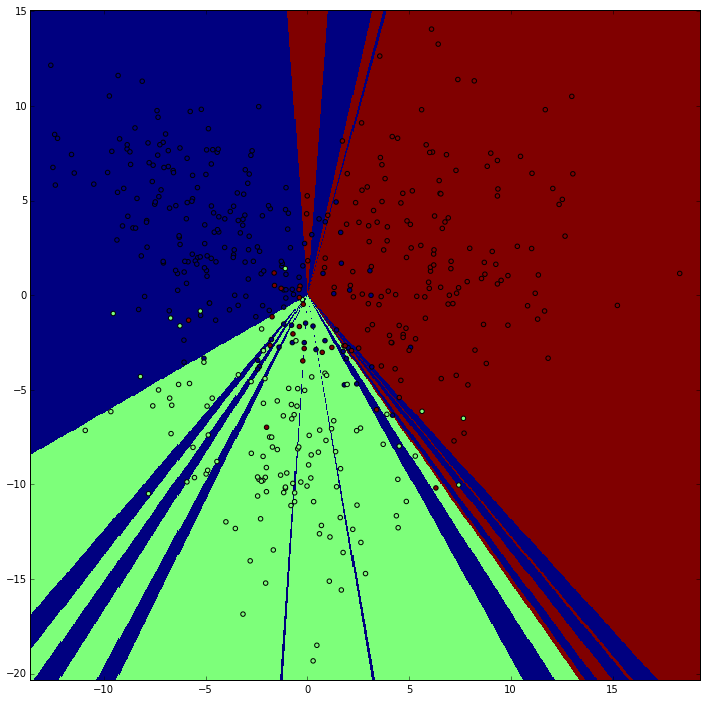

In [7]:
create_picture(x_train, y_train, precision=0.05)

## Радиус корзинки

In [8]:
a = scipy.stats.multivariate_normal.rvs(size=2600, mean=[-2, 9], cov=[[12, -5.5], [-5.5, 12]])
b = scipy.stats.multivariate_normal.rvs(size=2720, mean=[1.5, -2], cov=[[13, -3], [-3, 13]])
c = scipy.stats.multivariate_normal.rvs(size=2998, mean=[7, 8], cov=[[18, 3], [3, 18]])
x_train = np.vstack([a, b, c])
y_train = np.hstack([np.zeros(len(a)), np.ones(len(b)), np.ones(len(c)) * 2])

x_train = x_train - np.mean(x_train, axis=0)

test_numbers = int(0.15 * len(x_train))
x_test = x_train[-test_numbers:]
y_test = y_train[-test_numbers:]

x_train = x_train[:-test_numbers]
y_train = y_train[:-test_numbers]

In [9]:
train_mistake = [zero_one_loss(y_train, lsh_predict_classes(x_train, y_train, x_train, radius=i))\
                 for i in range(10)]

In [10]:
test_mistake = [zero_one_loss(y_test, lsh_predict_classes(x_train, y_train, x_test, radius = i))\
                for i in range(10)]

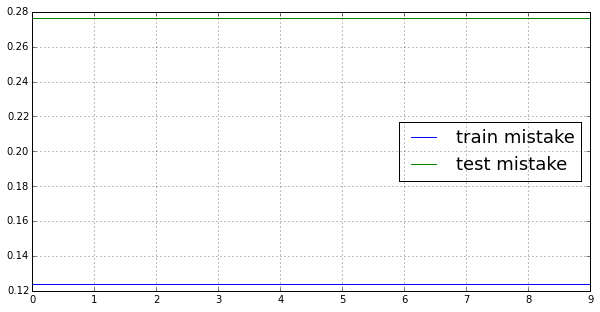

In [11]:
plt.figure(figsize=(10,5))
plt.plot(range(10), train_mistake, label='train mistake')
plt.plot(range(10), test_mistake, label='test mistake')
plt.legend(fontsize=18, loc='center right')
plt.grid()
plt.show()

## Число соседей

In [12]:
train_mistake = [zero_one_loss(y_train, lsh_predict_classes(x_train, y_train, x_train, number_neighbours=i))\
                 for i in range(1,15)]

In [13]:
test_mistake = [zero_one_loss(y_test, lsh_predict_classes(x_train, y_train, x_test, number_neighbours = i))\
                for i in range(1,15)]

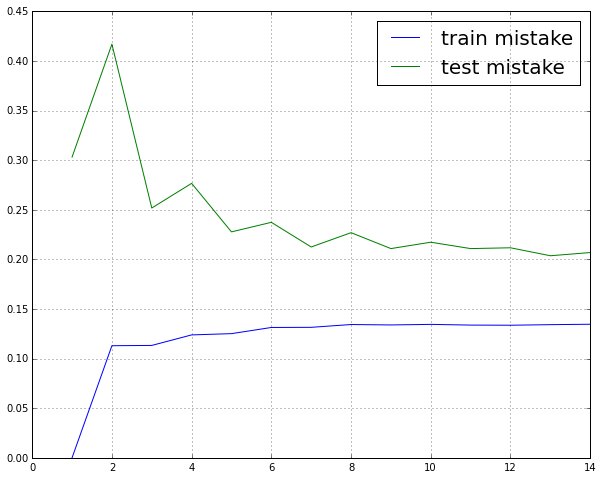

In [14]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 15), train_mistake, label='train mistake')
plt.plot(range(1, 15), test_mistake, label='test mistake')
plt.legend(fontsize=20)
plt.grid()
plt.show()

## Число деревьев

In [15]:
train_mistake = [zero_one_loss(y_train, lsh_predict_classes(x_train, y_train, x_train, number_estimators=i))\
                 for i in range(4,15)]

In [16]:
test_mistake = [zero_one_loss(y_test, lsh_predict_classes(x_train, y_train, x_test, number_estimators = i))\
                for i in range(4,15)]

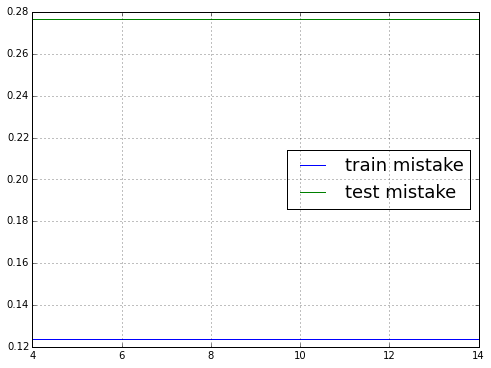

In [17]:
plt.figure(figsize=(8,6))
plt.plot(range(4, 15), train_mistake, label='train mistake')
plt.plot(range(4, 15), test_mistake, label='test mistake')
plt.legend(fontsize=18, loc='center right')
plt.grid()
plt.show()

## Стресс тест для сравнения с KNN

In [18]:
a = scipy.stats.multivariate_normal.rvs(size=4600, mean=[-2, 9], cov=[[12, -5.5], [-5.5, 12]])
b = scipy.stats.multivariate_normal.rvs(size=4720, mean=[1.5, -2], cov=[[13, -3], [-3, 13]])
c = scipy.stats.multivariate_normal.rvs(size=3998, mean=[7, 8], cov=[[18, 3], [3, 18]])
x_train = np.vstack([a, b, c])
y_train = np.hstack([np.zeros(len(a)), np.ones(len(b)), np.ones(len(c)) * 2])
x_train = x_train - np.mean(x_train, axis=0)

x_train = x_train - np.mean(x_train, axis=0)

a = scipy.stats.multivariate_normal.rvs(size=3600, mean=[-2, 9], cov=[[12, -5.5], [-5.5, 12]])
b = scipy.stats.multivariate_normal.rvs(size=3720, mean=[1.5, -2], cov=[[13, -3], [-3, 13]])
c = scipy.stats.multivariate_normal.rvs(size=2998, mean=[7, 8], cov=[[18, 3], [3, 18]])
x_test = np.vstack([a, b, c])
y_test = np.hstack([np.zeros(len(a)), np.ones(len(b)), np.ones(len(c)) * 2])

x_test = x_train - np.mean(x_train, axis=0)

In [19]:
%%time
model = KNeighborsClassifier(n_neighbors=4, algorithm='brute')
model.fit(x_train, y_train)
model.predict(x_test)

CPU times: user 2.8 s, sys: 240 ms, total: 3.04 s
Wall time: 3.03 s


In [20]:
%%time
classes = lsh_predict_classes(x_train, y_train, x_test)

CPU times: user 11.8 s, sys: 0 ns, total: 11.8 s
Wall time: 11.8 s
